## 실습 4.1. Deep Neural Network

MNIST 데이터 셋: 손으로 쓴 숫자들로 이루어진 공개된 데이터베이스

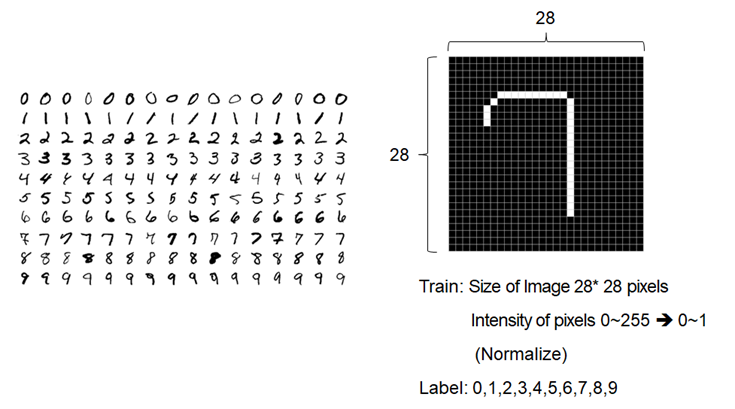


MNIST 문제는 손글씨 이미지 (intput)에 적혀 있는 숫자 (Output)을 분류하는 문제임.   
(Output이 숫자이긴 하지만, 연속적인 값이 아닌 이산적인 값이므로 "예측"이 아닌 "분류" 문제임.   
특히, Output이 0 ~ 9 까지의 총 10가지의 값을 가지므로 "다중분류"에 해당함.  

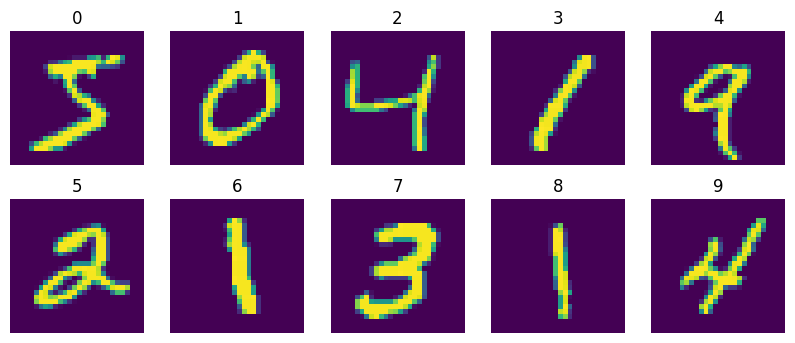

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#MNIST 데이터셋 불러오기 (Online에서 다운로드)  
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

#one-hot encoding
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

# 시각화
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(i)
plt.show()


In [2]:
# 이전 세션 클리어
tf.keras.backend.clear_session()

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=10,
                                activation=tf.nn.softmax,
                                kernel_initializer='he_uniform'))
model.summary()
# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.1)

model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics= tf.keras.metrics.CategoricalAccuracy())

model.fit(x_train, y_train, epochs=10,batch_size = 128)

acc = tf.keras.metrics.CategoricalAccuracy()
acc.update_state(y_train, model(x_train))
print("Train Accuracy: {:.4f}".format(acc.result().numpy()))
acc.update_state(y_test, model(x_test))
print("Test Accuracy: {:.4f}".format(acc.result().numpy()))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 2.9110 - categorical_accuracy: 0.4081
Epoch 2/10
469/469 [====================

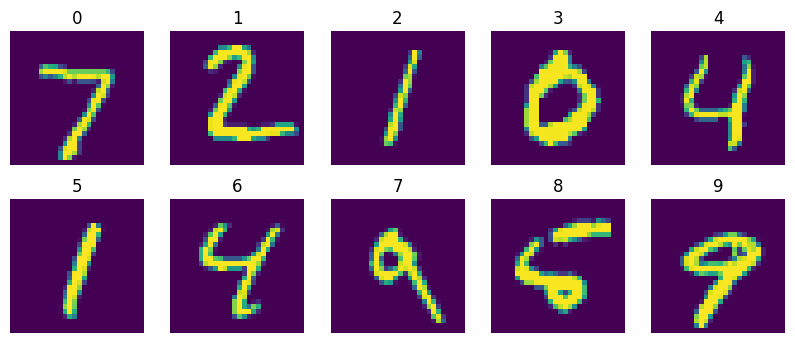

One_hot encoded Y : tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(10, 10), dtype=float32)
Y label : [7 2 1 0 4 1 4 9 5 9]
1/1 [==============================] - 0s 62ms/step
Softmax Pred. Y : [[4.8637876e-04 5.9966045e-03 1.3844454e-02 1.1934933e-01 6.7643352e-02
  9.5102787e-02 1.0543178e-03 3.4250259e-01 1.3395740e-01 2.2006284e-01]
 [7.0281759e-02 2.5824059e-25 2.7871460e-01 9.7757853e-05 2.2737243e-14
  4.1249838e-05 6.5086132e-01 6.9506559e-13 3.2441858e-06 5.4321216e-14]
 [1.6088799e-07 9.0255123e-01 9.0713805e-04 1.5150245e-02 2.2598630e-02
  9.9165989e-03 1.5541830e-04 1.4386570e-02 1.5829582e-02 1.8504456e-02]
 [9.9890816e-01 0.0000000e+00 2.8845568e-06 7.9189603e-19 0.0000000e+

In [3]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(i)
plt.show()

print("One_hot encoded Y :", y_test[0:10])
print("Y label :", np.argmax(y_test[0:10], axis=1))

y_pred = model.predict(x_test[0:10,:,:])
print("Softmax Pred. Y :", y_pred[0:10])
print("Pred Y label :", np.argmax(y_pred, axis=1))


In [4]:
# 설정 및 학습 코드는 앞 쪽의 MNIST 예제 코드 사용
tf.keras.backend.clear_session()

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))

model.summary()
# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.5)
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics= tf.keras.metrics.CategoricalAccuracy())
model.fit(x_train,y_train,epochs = 5, batch_size = 128)

m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_train, model.predict(x_train))
print("Train accuracy: {:5.4f}".format(m.result().numpy()))
m.update_state(y_test, model.predict(x_test))
print("Test accuracy: {:5.4f}".format(m.result().numpy()))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                       

### 실습. DNN model for MNIST

Train data의 Accuracy가 99% 이상, Test data의 Accuracy가 98% 이상이 되는 인자들의 값을 찾으시오.
